Использование данных без знаков препинания, приведение к начальной форме, без исправления ошибок

Для каждого пользователя есть метка: 1 - положительный, -1 -  отрицательный. Информация о метках содержится в таблице author.

Все сообщения пользователя объединить в единый отзыв. Для разметки использовать усредненный вектор.

In [1]:
%run user_data.ipynb
%run fun_to_work.ipynb

unable to import 'smart_open.gcs', disabling that module


Параметры

In [2]:
file_name = 'work3'
w2v_name = 'w2v_w3'
punctuation = True
hashtag = True
url = True
stem = True
errors = False
size = 200
window = 5
min_count = 3

In [3]:
marks = mess_to_txt(user, file_name, punctuation, hashtag, url, stem, errors)

123.39938807487488


In [4]:
create_model_w2v(file_name, w2v_name, size, window, min_count)

2020-04-29 01:17:39,563 : INFO : collecting all words and their counts
2020-04-29 01:17:39,566 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-29 01:17:39,646 : INFO : collected 13050 word types from a corpus of 106938 raw words and 3614 sentences
2020-04-29 01:17:39,647 : INFO : Loading a fresh vocabulary
2020-04-29 01:17:39,667 : INFO : effective_min_count=3 retains 4153 unique words (31% of original 13050, drops 8897)
2020-04-29 01:17:39,668 : INFO : effective_min_count=3 leaves 96023 word corpus (89% of original 106938, drops 10915)
2020-04-29 01:17:39,713 : INFO : deleting the raw counts dictionary of 13050 items
2020-04-29 01:17:39,715 : INFO : sample=0.001 downsamples 51 most-common words
2020-04-29 01:17:39,716 : INFO : downsampling leaves estimated 79533 word corpus (82.8% of prior 96023)
2020-04-29 01:17:39,761 : INFO : estimated required memory for 4153 words and 200 dimensions: 8721300 bytes
2020-04-29 01:17:39,763 : INFO : resetting layer

3.0011699199676514

In [5]:
model = load_model_w2v(w2v_name)

2020-04-29 01:17:46,996 : INFO : loading Word2Vec object from w2v_w3
2020-04-29 01:17:47,122 : INFO : loading wv recursively from w2v_w3.wv.* with mmap=None
2020-04-29 01:17:47,123 : INFO : setting ignored attribute vectors_norm to None
2020-04-29 01:17:47,124 : INFO : loading vocabulary recursively from w2v_w3.vocabulary.* with mmap=None
2020-04-29 01:17:47,125 : INFO : loading trainables recursively from w2v_w3.trainables.* with mmap=None
2020-04-29 01:17:47,125 : INFO : setting ignored attribute cum_table to None
2020-04-29 01:17:47,128 : INFO : loaded w2v_w3


In [6]:
text_vec = texts_to_vec(file_name, model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


1.3843138217926025


In [7]:
new_df = create_data_frame(text_vec, marks)

time =  59.51257109642029
f1 =  0.655504094179773
acc =  0.5578947368421053
rec =  0.7369177911044479
prec =  0.5994498477257098
auc =  0.5187474958408241


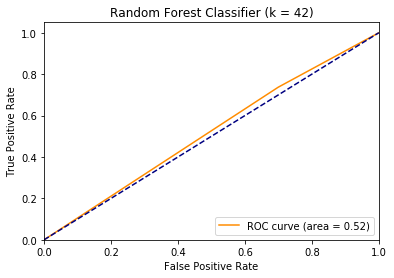

In [8]:
class_random_forest(new_df, 'marks', 5, 1, 100)